In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999
from scipy import stats

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.columns = map(str.lower, df.columns)

In [6]:
df[pd.isna(df['name'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Two of the entries do not have a name, and many other data, I will drop them. Because its just 2 entries and will nor hurt data much.

In [7]:
df.dropna(subset=['name'],inplace=True)

269 entries have missing year of release, its a really small portion of the data so I will drop these data too.

In [8]:
df.dropna(subset=['year_of_release'],inplace=True)

Now lets work with missing values in critic and user score columns, here I will use the approach disscuseed in Slack and approved by a mentor. I will replace NaNs with -1 and TBDs with -2. I will replace the missing values in rating column with not available.

In [9]:
df['critic_score']=df['critic_score'].fillna(-1)

In [10]:
df['user_score']=df['user_score'].fillna(-1)

In [11]:
df['user_score'] = df['user_score'].replace('tbd',-2)

In [12]:
df['rating'] = df['rating'].fillna('not available')

The missing data in sales, scores and rating is fine. Now lets transform the data types, the only place where I see this possible is year of release column where entries should be ints and also user score should be float.

In [13]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [14]:
df['user_score'] = df['user_score'].astype(float)

In [15]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

**Look at how many games were released in different years. Is the data for every period significant?**

In [16]:
df.groupby('year_of_release')['year_of_release'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

as I can see not much games were released before 1994, then the number of games released started increasing significantly, however after 2011 the number started decreasing again.

**Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?**

In [17]:
tt=df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

In [18]:
tt

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Here I can see that the platforms with the highest total sales are: PS2, X360,PS3,Wii,DS and PS, then the sales start to decrease a lot.

In [19]:
tt=df.groupby(['year_of_release','platform'],as_index=False).agg({'total_sales':['sum']})

In [20]:
tt.columns=['year_of_release','platform','total_sales']

In [21]:
tt=tt[(tt['platform']=='PS2') | (tt['platform']=='X360') | (tt['platform']=='PS3') | (tt['platform']=='Wii') | (tt['platform']=='DS') | (tt['platform']=='PS')]

In [22]:
tt=tt.drop(tt.index[0])

In [23]:
data = tt.pivot(index='platform',columns='year_of_release',values='total_sales')

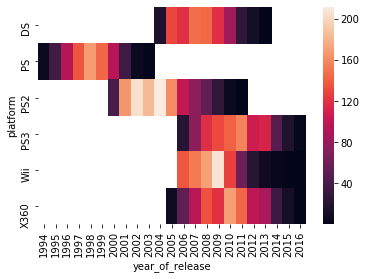

In [24]:
sns.heatmap(data);

Here we can see a heatmap, which shows the sales per platform per year. PS,DS and PS2 used to be a popular platforms but then their popularity dropped to zero. PS was a popular platform for 9 years and then the new platform DS appeared which was popular for 10 years. PS2 was popular for 11 years. This means that platforms are popular on average for 10 years.

**Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.**

Because I determined that the platforms are popular for an average of 10 years, for prognosis I will look at the data from 2007

**Work only with the data that you've decided is relevant. Disregard the data for previous years.**

In [25]:
df = df[df['year_of_release']>2006]

**Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.**

In [26]:
tt=df.groupby(['year_of_release','platform'],as_index=False).agg({'total_sales':['sum']})

In [27]:
tt.columns=['year_of_release','platform','total_sales']

In [28]:
data = tt.pivot(index='platform',columns='year_of_release',values='total_sales')

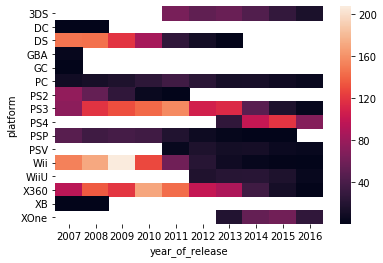

In [29]:
sns.heatmap(data);

from this heatmap I can see that 3DS is shrinking, DC is dead as well as DS, GBA, GC, PS2,PSP and XB. PC sales seem to be stable, PS3 is shrinking, PS4 seemed to be growing but in 2016 it shrinked a bit,  PSV seems to be shrinking, Wii is shrinking too, WiiU is shrinking too, X360 is shrinking too. XOne situation seems to be similar to PS4. Overall I think that XOne, PS4 and PC are potentially profitable platforms.

**Build a box plot for the global sales of each game, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.**

In [30]:
df["platform"]


2         Wii
3         Wii
8         Wii
13        Wii
14       X360
         ... 
16707     PSV
16709     PS2
16710     PS3
16712     PSV
16714     PSV
Name: platform, Length: 9327, dtype: object

In [31]:
tt = df.groupby('platform',as_index=False).agg({'total_sales':['sum']})

In [32]:
tt.columns=['platform','total_sales']

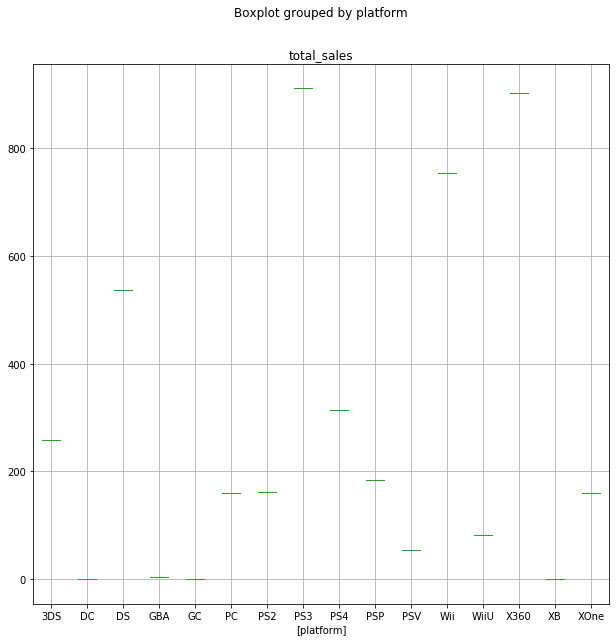

In [33]:
tt.boxplot(by='platform',figsize=(10,10));

## Review

You don't need to aggregate data when building boxplot. Here you have one value for each boxplot, so they are just points

---

Here we can see that the difference in sales is really significant, for example between PS3 and PS4 but I guess It is because PS4 is relatively new.

**Take a look at how user and professional reviews affect sales for a particular popular platform. Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.**

For the particulat platform I will select PC since it was always present and has a lot of data. And also I will select critic and user scores that are higher then 0 because I replaced NaNs and tbds with -1 and -2.

In [36]:
tt = df[(df['platform']=='PC') & (df['user_score']>0)&(df['critic_score']>0)]

In [37]:
tt = tt.groupby(['user_score','critic_score'],as_index=False)['total_sales'].sum()

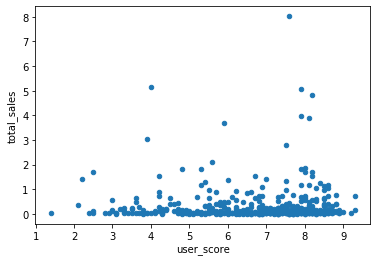

In [38]:
tt.plot.scatter(x='user_score',y='total_sales');

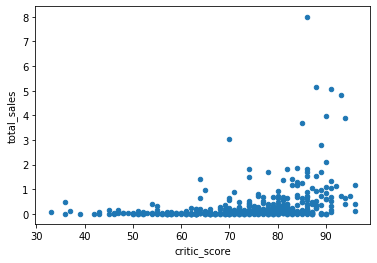

In [39]:
tt.plot.scatter(x='critic_score',y='total_sales');

Here I can see that there is no real correalation between the reviews and scores, some games have the highest reviews but low sales and some games have relatively high scores but low sales.

**Keeping your conclusions in mind, compare the sales of the same games on other platforms.**

In [40]:
tt=df.groupby('name',as_index=False).agg({'total_sales':['count','mean','min','max']})

In [41]:
tt.columns = ['name','count','mean','min','max']

In [42]:
tt = tt[tt['count']>1]

here I look at the games that were released on at least 2 different platforms. I will compare the mean of the total sales to min and max to determine if the sales on different platforms have a noticable difference or not, however because there are so many games I will just look at first 7

In [43]:
tt = tt.drop(tt.index[5:1670])

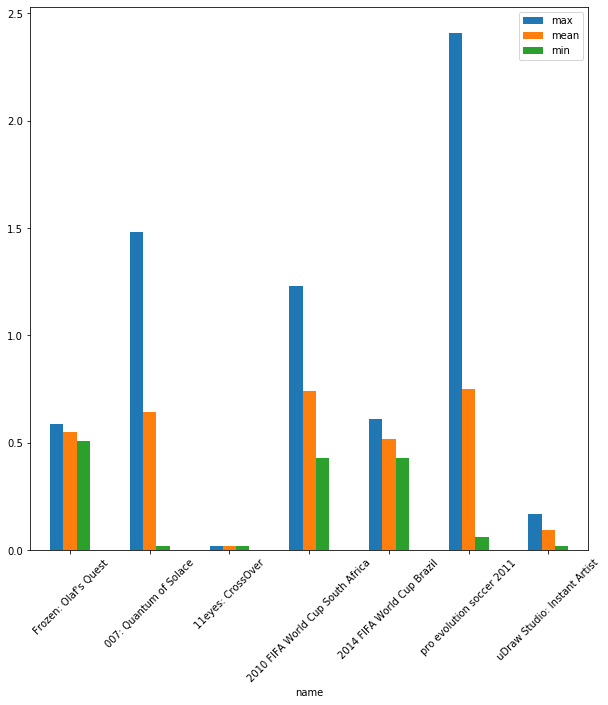

In [44]:
tt.plot(x='name',y=['max','mean','min'],kind='bar',figsize=(10,10),rot=45);

here we can see that there is a slight difference between sales on each platform, however sometimes the difference is huge.

**Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?**

In [45]:
tt = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

In [46]:
tt

genre
Action          1050.59
Shooter          678.80
Sports           658.07
Misc             487.89
Role-Playing     465.03
Racing           265.19
Platform         230.45
Simulation       199.13
Fighting         166.00
Adventure        129.99
Puzzle            79.18
Strategy          68.99
Name: total_sales, dtype: float64

I can see that Action, Shooter and sports games are the three most profitable genres. On the other hand Puzzle and Strategy games have the least sales. I can generalize that the games that are hard to play have the lowest sales and easy to play enjoyable games have highest.

**For each region (NA, EU, JP), determine:**

**The top five platforms. Describe variations in their market shares from region to region.**

In [47]:
tt = df.groupby('platform',as_index=False).agg({'na_sales':['sum'],'eu_sales':['sum'],'jp_sales':['sum'],'total_sales':['sum']})

In [48]:
tt.columns = ['platform','na_sales','eu_sales','jp_sales','total_sales']

In [49]:
tt.sort_values(by='na_sales',ascending=False)[:5]

,platform,na_sales,eu_sales,jp_sales,total_sales
13,X360,553.68,257.05,10.82,901.37
11,Wii,416.01,214.70,59.13,754.03
7,PS3,381.29,319.83,78.33,910.38
2,DS,273.98,119.92,102.93,535.54
8,PS4,108.74,141.09,15.96,314.14


Top five platforms for Na are X360, Wii, PS3, DS and PS4.

In [50]:
tt.sort_values(by='eu_sales',ascending=False)[:5]

,platform,na_sales,eu_sales,jp_sales,total_sales
7,PS3,381.29,319.83,78.33,910.38
13,X360,553.68,257.05,10.82,901.37
11,Wii,416.01,214.70,59.13,754.03
8,PS4,108.74,141.09,15.96,314.14
2,DS,273.98,119.92,102.93,535.54


top five platforms for EU are PS3, X360, Wii, PS4 and DS

In [51]:
tt.sort_values(by='jp_sales',ascending=False)[:5]

,platform,na_sales,eu_sales,jp_sales,total_sales
2,DS,273.98,119.92,102.93,535.54
0,3DS,82.65,61.27,100.62,257.81
7,PS3,381.29,319.83,78.33,910.38
9,PSP,52.50,40.29,66.24,183.31
11,Wii,416.01,214.70,59.13,754.03


top five platforms for JP are DS, 3DS, PS3, PSP and Wii

So the top 5 platforms from all of the regions are X360, Wii,PS3,DS, PS4,3DS and PSP, Now lets look at their market shares. Market share will be sales/total_sales

Lets start by adding the columns with market shares.

In [52]:
tt['na_share'] = tt['na_sales'] / tt['total_sales']

In [53]:
tt['eu_share'] = tt['eu_sales'] / tt['total_sales']

In [54]:
tt['jp_share'] = tt['jp_sales'] / tt['total_sales']

Lets start by looking at X360

In [55]:
tt[tt['platform'] == 'X360']

,platform,na_sales,eu_sales,jp_sales,total_sales,na_share,eu_share,jp_share
13,X360,553.68,257.05,10.82,901.37,0.614265,0.285177,0.012004


we can see that X360 holds a 61% share in na region 28 % in europe and 1% in japan. I can conclude that the X360 was really popular in NA however really impopular in japan holding just 1%

now lets look at Wii

In [56]:
tt[tt['platform'] == 'Wii']

,platform,na_sales,eu_sales,jp_sales,total_sales,na_share,eu_share,jp_share
11,Wii,416.01,214.7,59.13,754.03,0.551715,0.284737,0.078419


we can see that Wii holds a 55% share in na region 28 % in europe and 7% in japan. I can conclude that the Wii was really popular in NA however really impopular in japan holding just 8%.

now lets look at PS3

In [57]:
tt[tt['platform'] == 'PS3']

,platform,na_sales,eu_sales,jp_sales,total_sales,na_share,eu_share,jp_share
7,PS3,381.29,319.83,78.33,910.38,0.418825,0.351315,0.086041


we can see that PS3 holds a 41% share in na region 35 % in europe and 8% in japan. I can conclude that the PS3 had almost the same popularity in EU and NA holding 35% and 41% of the share however was a lot less popular in Japan holding almost 9%

Now lets look at DS

In [58]:
tt[tt['platform'] == 'DS']

,platform,na_sales,eu_sales,jp_sales,total_sales,na_share,eu_share,jp_share
2,DS,273.98,119.92,102.93,535.54,0.511596,0.223924,0.192199


we can see that DS holds a 51% share in na region 22 % in europe and 2% in japan. I can conclude that the DS was really popular in NA however really impopular in japan holding just 2%.

Now lets look at PS4

In [59]:
tt[tt['platform'] == 'PS4']

,platform,na_sales,eu_sales,jp_sales,total_sales,na_share,eu_share,jp_share
8,PS4,108.74,141.09,15.96,314.14,0.346151,0.449131,0.050805


we can see that PS4 holds a 34% share in na region 44 % in europe and 5% in japan. I can conclude that ps4 had almost the same popularity in EU and Na however it was a lot less popular in Japan

Now lets look at 3DS

In [60]:
tt[tt['platform'] == '3DS']

,platform,na_sales,eu_sales,jp_sales,total_sales,na_share,eu_share,jp_share
0,3DS,82.65,61.27,100.62,257.81,0.320585,0.237656,0.390287


we can see that 3DS holds a 32% share in na region 23 % in europe and 39% in japan. I can conclude that 3DS had close popularity in all over the world

Now lets look at PSP

In [61]:
tt[tt['platform'] == 'PSP']

,platform,na_sales,eu_sales,jp_sales,total_sales,na_share,eu_share,jp_share
9,PSP,52.5,40.29,66.24,183.31,0.2864,0.219792,0.361355


we can see that PSP holds a 28% share in na region 21 % in europe and 36% in japan. I can conclude that the PSP was really popular in JAPAN however in Na and Eu it had almost the same popularity with just 5% difference in market share

**The top five genres. Explain the difference**

In [62]:
tt = df.groupby('genre',as_index=False).agg({'na_sales':['sum'],'eu_sales':['sum'],'jp_sales':['sum'],'total_sales':['sum']})

In [63]:
tt.columns = ['genre','na_sales','eu_sales','jp_sales','total_sales']

In [64]:
tt.sort_values(by='na_sales',ascending=False)[:5]

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,492.17,335.67,96.29,1050.59
8,Shooter,350.11,230.16,17.46,678.80
10,Sports,323.86,211.49,40.28,658.07
3,Misc,259.16,127.62,48.79,487.89
7,Role-Playing,175.41,102.67,150.55,465.03


Top five genres in Na: Action, Shooter, Sports, Misc and Role-Playing.

In [65]:
tt.sort_values(by='eu_sales',ascending=False)[:5]

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,492.17,335.67,96.29,1050.59
8,Shooter,350.11,230.16,17.46,678.80
10,Sports,323.86,211.49,40.28,658.07
3,Misc,259.16,127.62,48.79,487.89
6,Racing,112.68,104.63,12.33,265.19


Top five genres in EU: Action, Shooter, Sports, Misc and Racing.

In [66]:
tt.sort_values(by='jp_sales',ascending=False)[:5]

,genre,na_sales,eu_sales,jp_sales,total_sales
7,Role-Playing,175.41,102.67,150.55,465.03
0,Action,492.17,335.67,96.29,1050.59
3,Misc,259.16,127.62,48.79,487.89
10,Sports,323.86,211.49,40.28,658.07
1,Adventure,56.41,35.32,26.91,129.99


Top five genres in japan: Role-playing, Action, Misc, Sports and Advanture

In conclusion I can say that NA and EU seem to have almost the similar interests with the only difference beeing Role-Playing and Racing in the fifth place. However Japan has different genre distribution whatsoever with Role-Playing on the first place which is only present in Na top five and in the fifth place, also Japan has Adventure in its top five which is not present in any other top five

**Do ESRB ratings affect sales in individual regions?**

In [67]:
tt = df.groupby('rating',as_index=False).agg({'na_sales':['sum'],'eu_sales':['sum'],'jp_sales':['sum'],'total_sales':['sum']})

In [68]:
tt.columns = ['rating','na_sales','eu_sales','jp_sales','total_sales']

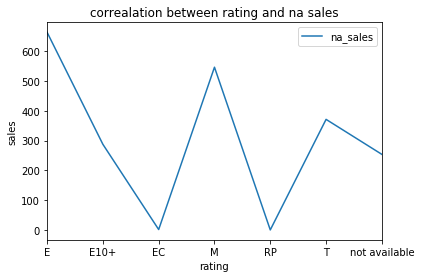

In [69]:
tt.plot(x='rating',y='na_sales');
plt.ylabel('sales');
plt.title('correalation between rating and na sales');

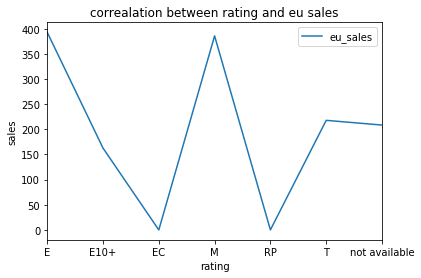

In [70]:
tt.plot(x='rating',y='eu_sales');
plt.ylabel('sales');
plt.title('correalation between rating and eu sales');

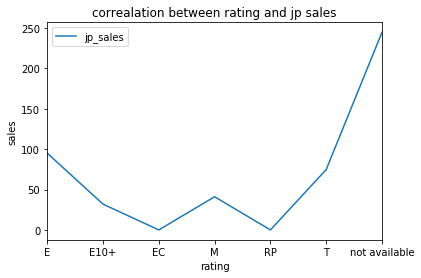

In [71]:
tt.plot(x='rating',y='jp_sales');
plt.ylabel('sales');
plt.title('correalation between rating and jp sales');

I conclude that no doubt the ratings affect sales. In eu and Na this effect seems to be almost the same, we can see that because the grapghs look almost the same, However in Japan the effect is different, for exampla in japan E games have almost twice amount of sales then M games, In Na and Eu however these numbers are really close.

**Average user ratings of the Xbox One and PC platforms are the same.**

The null hypothesis will be: average User ratings of XboX one and PC are the same

because I filled the missing values with -1s and -2s I will work with data where user scores are higher then 0

In [79]:
tf = df[df['user_score']>0]

In [80]:
tt=tf.groupby('platform',as_index=False).agg({'user_score':['mean','std','var']})

In [81]:
tt.columns = ['platform','mean','std','var']

In [82]:
tt = tt[(tt['platform'] == 'XOne') | (tt['platform']=='PC')]

In [83]:
tt

,platform,mean,std,var
3,PC,6.765499,1.529815,2.340334
13,XOne,6.521429,1.380941,1.906997


We can see that the variances are different

In [84]:
x = tf[tf['platform']=='XOne']['user_score']
y = tf[tf['platform']=='PC']['user_score']

In [85]:
stats.ttest_ind(x,y,equal_var = False)

Ttest_indResult(statistic=-2.0215585703121315, pvalue=0.04401892858926169)

In this test the pvalue is 0.04 thus we can reject the hypothesys and thus the average user ratings of Xbox One and Pc are not the same

**Average user ratings for the Action and Sports genres are different.**

The null hypothesis will be: Average user ratings for action and sports genres are the same

In [86]:
tt = tf.groupby('genre',as_index=False).agg({'user_score':['var']})

In [87]:
tt.columns = ['genre','var']

In [88]:
tt['genre'].value_counts()

Shooter         1
Role-Playing    1
Adventure       1
Simulation      1
Fighting        1
Platform        1
Action          1
Sports          1
Puzzle          1
Racing          1
Misc            1
Strategy        1
Name: genre, dtype: int64

In [89]:
tt = tt[(tt['genre']=='Action')|(tt['genre']=='Sports')]

In [90]:
tt

,genre,var
0,Action,1.830189
10,Sports,2.814035


The variances are different.

In [91]:
x = tf[tf['genre']=='Action']['user_score']
y = tf[tf['genre']=='Sports']['user_score']

In [92]:
stats.ttest_ind(x,y,equal_var = False)

Ttest_indResult(statistic=6.661247173505023, pvalue=4.540665510055229e-11)

Pvalue for the test is 4.540665510055229e-11 which is the same as 4.540665510055229 * 10^-11 which is a really small number thus we can reject the null hypothesis and thus average user ratings for action and sports genres are not the same.

**Final Conclusion**

In this project I explored the dataset and performed the data preperation step at first, then I calculated the total_sales for each game. Then i analyzed the data and determined that to make a prediction for the 2017 year we need to use data from 2007 because the platforms hold their populatity for an average 10 years. then I Looked at which platforms were leading in sales and concluded that user reviews do not have effect on the total sales of the game. I looked if same games have different total sales on different platforms and looked at the most profitable genres. After all this I created the user profile for each of the regions and looked at top five platforms and genres for each region. I concluded that Japan has different interest in game Genres then Na and Eu which were similar, similarly after looking how ratings affect total sales per region I concluded that the ratings affect Eu and Na by the same way and Japan in different way. Then I analyzed two hypothesiss and rejected the first one and passed the second one thus: Average user ratings of the Xbox One and PC platforms are different and Average user ratings for the Action and Sports genres are different.